In [30]:
import numpy as np
from scipy.integrate import odeint  #Esta libreria nos permite solucionar ecuaciones diferenciales.
import matplotlib.pyplot as plt
from mpmath import cot
from mpl_toolkits import mplot3d

# Solución de las ecuaciones geodesicas utilizando ODEINT.

In [31]:
def fun (A ,s):        #Definimos una función, la cuál recibira un arreglo y la variable respecto a la cuál vamos a solucionar
                       #las ecuaciones diferenciales.
  θ , x , Φ , y = A
  return [x , (np.sin(θ)*np.cos(θ))*y**2 , y, -2*cot(θ)*x*y]
f0 = [np.pi/2 , 1/np.sqrt(2),0 , 1/np.sqrt(2)]  #Damos nuestras condiciones iniciales
s=np.linspace(0,2*np.pi,1000000)
sol = odeint(fun, f0, s)   #Hacemos la solución de nuestras ecuaciones diferenciales. 

# Grafico de las soluciones.

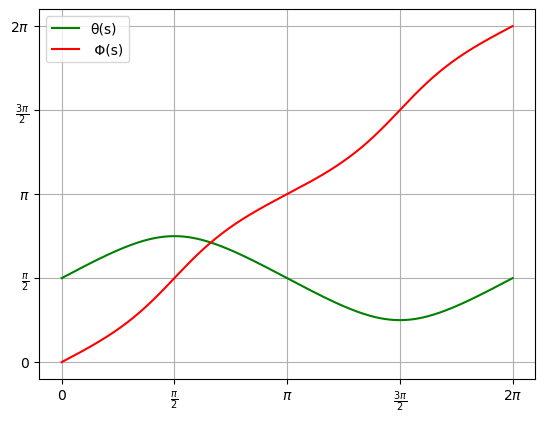

In [32]:
fig, axes = plt.subplots()
axes.plot(s, sol [: , 0], "g", label = "θ(s)")
#axes.plot(s, sol [: , 1], "b")
axes.plot(s, sol [: , 2], "r", label = " Φ(s)")
#axes.plot(s, sol [: , 3], "c")
axes.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
axes.set_yticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
axes.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
axes.set_yticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.grid()
plt.show()

# Evaluamos nuestros resultados en la respectiva parametrización.

In [33]:
x = np.sin(sol [: , 0])*np.cos(sol [: , 2])
y = np.sin(sol [: ,0])*np.sin(sol [: , 2])
z = np.cos(sol [: , 0])

# Grafico de la esfera y la solución de la Geodesica.

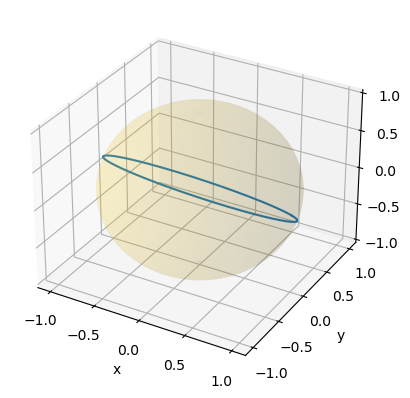

In [34]:
def sphere (r):
  u = np.linspace(0,2*np.pi,200)
  v = np.linspace(0, np.pi, 200)
  d = (r)*np.outer(np.cos(u), np.sin(v))
  e = (r)*np.outer(np.sin(u), np.sin(v))
  g = (r)*np.outer(np.ones(np.size(u)), np.cos(v))
  return d,e,g
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.plot(x,y,z)
d,e,g = sphere(1)
ax.plot_surface(d, e, g, rstride=3, cstride=3, color=(1,0.8,0,0.1))
plt.show()

# Solución utilizando el método de Euler.

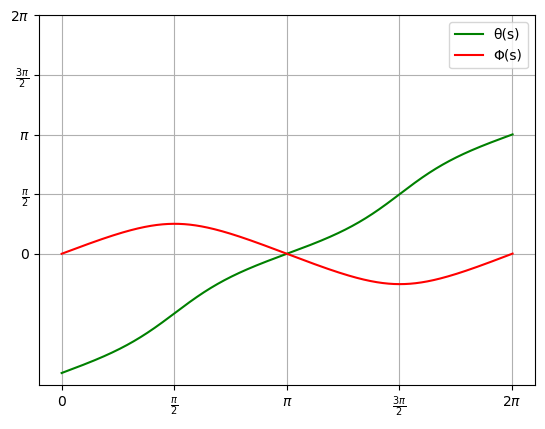

In [35]:
import matplotlib.pyplot as plt 
import numpy as np 
def m (Φ):
  return 2*(np.sin(Φ)/np.cos(Φ))  #tan(Φ)
def p(Φ) :
  return -np.cos(Φ)*np.sin(Φ) 
N = 1000
h = 2*np.pi/(N-1)
θ = [-np.pi]
x = [(1)/(np.sqrt(2))]
Φ = [0]
y = [(1)/(np.sqrt(2))]
s = [0]

for n in range(N):
  s.append(s[n] + h)
  θ.append(θ[n] + h*x[n])
  x.append(x[n] + h*m(Φ[n])*x[n]*y[n])
  Φ.append(Φ[n] + h*y[n])
  y.append(y[n] + h*p(Φ[n])*x[n]**2) 
fig, axes = plt.subplots()
plt.plot(s,θ,"g", label = "θ(s)")
plt.plot(s,Φ,"r", label = "Φ(s)")
axes.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
axes.set_yticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
axes.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
axes.set_yticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.grid()
plt.show()

# Gráfico de la Esfera y la solución.

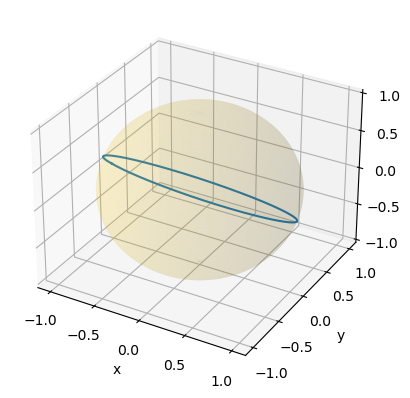

In [36]:
X = np.cos(θ)*np.cos(Φ)
Y = np.sin(θ)*np.cos(Φ)
Z = np.sin(Φ)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zticks([-1,-0.5,0,0.5,1])
ax.plot(X,Y,Z)
d,e,g = sphere(1)
ax.plot_surface(d, e, g, rstride=3, cstride=3, color=(1,0.8,0,0.1))
plt.show()

# Proyección de la geodesica con Mercator.

In [37]:
x = []
y = []
def proyec ( Φ):
  return np.log((np.sin(((Φ)/(2))+ ((np.pi)/(4))))/(np.cos(((Φ)/(2))+ ((np.pi)/(4)))))

In [38]:
for i in Φ :
  y.append(proyec(i))

# Grafico de la proyección.

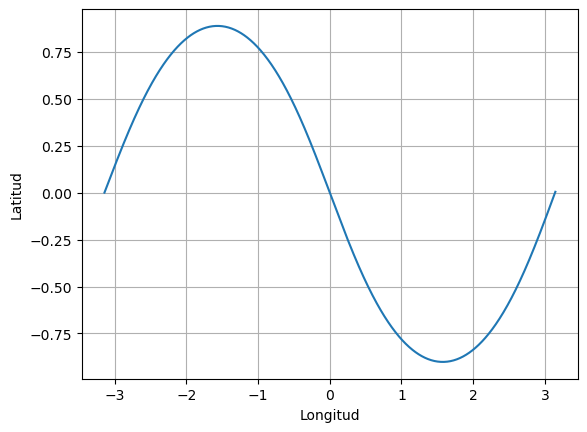

In [39]:
fig, axes = plt.subplots()
plt.plot(θ, y)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
#axes.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
#axes.set_yticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
#axes.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
#axes.set_yticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.show()

# Conversión de Radianes a Grados.

In [40]:
import math
grados1 = [math.degrees(radian) for radian in  Φ]
grados = [math.degrees(radian) for radian in y]
grados2 = [math.degrees(radian) for radian in θ]

In [41]:
grados[-1]

0.2549460485525804

# Proyección de la geodesica sobre el mapa.

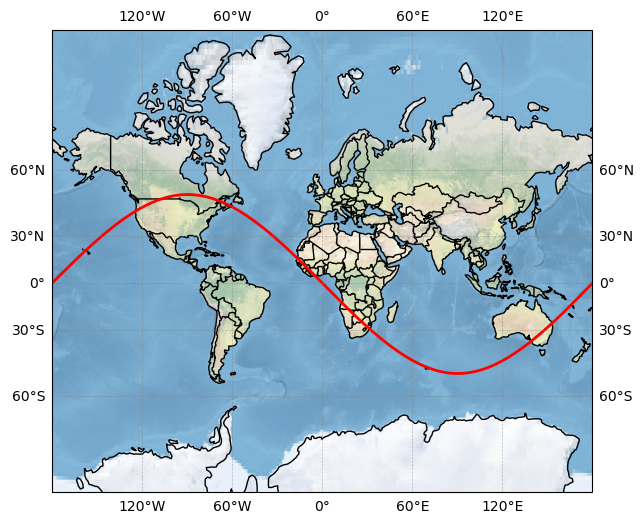

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
# Crear una instancia de la proyección de Mercator
projection = ccrs.Mercator()

# Crear la figura y los ejes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Dibujar el mapa de fondo
ax.coastlines()
ax.stock_img()
ax.add_feature(cf.BORDERS)
# Dibujar meridianos y paralelos
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Dibujar geodésicas
plt.plot(grados2,grados, marker=None, linewidth=2, color='red', transform=ccrs.PlateCarree())

# Mostrar el mapa
plt.show()


# Grafico de la tierra utilizando Plotly

In [43]:
import plotly.graph_objects as go  #nos permite hacer graficos iinteractivos.

fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [44]:
import plotly.graph_objects as go


fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(    #Agregar detalles al grafico de la tierra.
    landcolor="green",
    showocean=True,
    oceancolor="lightblue",
    showlakes=True,
    lakecolor="lightblue"
)

In [45]:
import plotly.graph_objects as go

# Crear el gráfico de la Tierra
fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=600, margin={"r":0, "t":0, "l":0, "b":0})
fig.update_geos(
    landcolor="green",
    showocean=True,
    oceancolor="lightblue",
    showlakes=True,
    lakecolor="lightblue"
)

# Agregar líneas al gráfico
latitudes = grados1 
longitudes = grados2  

fig.add_trace(go.Scattergeo(
    lat=latitudes,
    lon=longitudes,
    mode='lines',
    line=dict(
        color='red',
        width=2
    ),
))

# Mostrar el gráfico
fig.show()


# Calculo de las distancia entre paises.

In [46]:
#Importar el módulo geodésico de la biblioteca geopy
from geopy.distance import geodesic as GD

# Para las ubicaciones especificadas, cargue sus datos de latitud y longitud.
Colombia =(4.570868 , -74.297333)
España =( 40.463667, -3.74922)

#Finalmente, imprime la distancia entre los dos sitios en kilómetros.
print("La distancia entre Colombia y España es:  ", GD(Colombia,España).km)

La distancia entre Colombia y España es:   8040.015722080529


# Calculo de la geodesica entre Ciudad de Mexico y Madrid.

In [47]:
import plotly.graph_objects as go
from geopy.distance import geodesic

# Coordenadas geográficas de Ciudad de México y Madrid
Ciudad_de_mexico = (19.42847, -99.12766)
madrid = (40.4168, -3.7038)

# Cálculo de la distancia geodésica en kilómetros
distance = geodesic(Ciudad_de_mexico, madrid).kilometers

# Crear el gráfico de la Tierra
fig = go.Figure(go.Scattergeo())  #Crea un gráfico vacio con coordenadas geográficas
fig.update_geos(projection_type="orthographic") #Nos muestra el globo terraqueo.
fig.update_layout(height=600, margin={"r":0, "t":0, "l":0, "b":0}) #Actualiza el diseño del grafico
fig.update_geos(
    landcolor="green",  #Color de los paises en verde.
    showocean=True,     #Se muestran los oceanos.
    oceancolor="lightblue", #El color de los oceanos.
    showlakes=True,     #Se muestran los lagos.
    lakecolor="lightblue", #El color de los lagos.
    showcountries=True, countrycolor="RebeccaPurple",
)

# Agregar los puntos y la línea que representa la distancia geodésica
fig.add_trace(go.Scattergeo(
    lon = [Ciudad_de_mexico[1], madrid[1]],
    lat = [Ciudad_de_mexico[0], madrid[0]],
    mode = 'lines',
    line = dict(width = 2, color = 'red'),
))

fig.add_trace(go.Scattergeo(
    lon = [Ciudad_de_mexico[1], madrid[1]],
    lat = [Ciudad_de_mexico[0], madrid[0]],
    mode = 'markers',
    marker = dict(size = 5, color = 'blue'),
    text = ['Ciudad_de_mexico', 'Madrid'],
))

# Configuración adicional del diseño del gráfico
fig.update_layout(
    title = 'Distancia Geodésica entre Ciudad de México y Madrid',
    showlegend = False,
)

# Imprimir la distancia geodésica
print(f"Distancia geodésica entre Ciudad de México y Madrid: {distance} kilómetros")

# Mostrar el gráfico
fig.show()

Distancia geodésica entre Ciudad de México y Madrid: 9076.835643550194 kilómetros


# Geodesica entre Centro islamico de Washington y La Meca.

In [48]:
import plotly.graph_objects as go
from geographiclib.geodesic import Geodesic  #proporciona métodos para calcular geodésicas
                                             #entre dos puntos en la superficie de la Tierra.

# Coordenadas geográficas del Centro islamico de Washington y La Meca.
Cen_Isl_Wash = (39.91722, -77.05668)
Meca= (21.4266400, 39.8256300)

# Calcular la geodésica entre las coordenadas
geod = Geodesic.WGS84.InverseLine(Cen_Isl_Wash[0], Cen_Isl_Wash[1], Meca[0], Meca[1])

#WGS84 se refiere a un sistema de coordenadas.

# Calcular los puntos a lo largo de la geodésica
n_points = 100  # Número de puntos a calcular
distances = np.linspace(0, geod.s13, n_points) # s13 representa la longitud total de la geodésica.
lon = np.zeros(n_points)
lat = np.zeros(n_points)
for i, distance in enumerate(distances):
    g = geod.Position(distance)
    lon[i] = g['lon2']
    lat[i] = g['lat2']

# Crear el gráfico de la Tierra
fig = go.Figure(go.Scattergeo())  # Crea un gráfico vacío con coordenadas geográficas
fig.update_geos(projection_type="orthographic")  # Nos muestra el globo terráqueo.
fig.update_layout(height=600, margin={"r": 0, "t": 0, "l": 0, "b": 0})  # Actualiza el diseño del gráfico
fig.update_geos(
    landcolor="green",  # Color de los países en verde.
    showocean=True,  # Se muestran los océanos.
    oceancolor="lightblue",  # El color de los océanos.
    showlakes=True,  # Se muestran los lagos.
    lakecolor="lightblue",  # El color de los lagos.
    showcountries=True, countrycolor="RebeccaPurple",
)

# Agregar los puntos y la línea que representa la geodésica
fig.add_trace(go.Scattergeo(
    lon=lon,
    lat=lat,
    mode='lines',
    line=dict(width=2, color='red'),
))

fig.add_trace(go.Scattergeo(
    lon=[Cen_Isl_Wash[1], Meca[1]],
    lat=[Cen_Isl_Wash[0], Meca[0]],
    mode='markers',
    marker=dict(size=5, color='blue'),
    text=['Cen_Isl_Wash', 'Meca'],
))

# Configuración adicional del diseño del gráfico
fig.update_layout(
    title='Geodesica entre Cen_Isl_Wash y la Meca',
    showlegend=False,
)

# Mostrar el gráfico
fig.show()

In [49]:
Grados = [math.radians(grado) for grado in lat]

In [50]:
import numpy as np

latitud = []

def proyec(Φ):
    return np.log((np.sin(Φ/2 + np.pi/4)) / (np.cos(Φ/2 + np.pi/4)))

for i in Grados:
    latitud.append(proyec(i))

Grados1 = [math.degrees(radian) for radian in latitud]

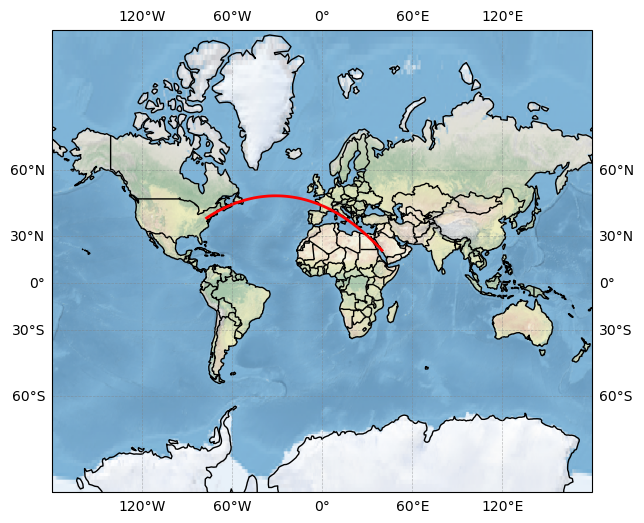

In [51]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
# Crear una instancia de la proyección de Mercator
projection = ccrs.Mercator()

# Crear la figura y los ejes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Dibujar el mapa de fondo
ax.coastlines()
ax.stock_img()
ax.add_feature(cf.BORDERS)
# Dibujar meridianos y paralelos
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Dibujar geodésicas
plt.plot(lon,lat, marker=None, linewidth=2, color='red', transform=ccrs.PlateCarree())

# Mostrar el mapa
plt.show()

# Geodesica entre Ciudad de México y Madrid.

In [52]:
import plotly.graph_objects as go
from geographiclib.geodesic import Geodesic

# Coordenadas geográficas de Bogotá y Madrid
Ciudad_de_mexico = (19.42847, -99.12766)
madrid = (40.4168, -3.7038)

# Calcular la geodésica entre las coordenadas
geod = Geodesic.WGS84.InverseLine(Ciudad_de_mexico[0], Ciudad_de_mexico[1], madrid[0], madrid[1])

# Calcular los puntos a lo largo de la geodésica
n_points = 100  # Número de puntos a calcular
distances = np.linspace(0, geod.s13, n_points)
print(geod.s13)
lon = np.zeros(n_points)
lat = np.zeros(n_points)
for i, distance in enumerate(distances):
    g = geod.Position(distance)
    lon[i] = g['lon2']
    lat[i] = g['lat2']

# Crear el gráfico de la Tierra
fig = go.Figure(go.Scattergeo())  # Crea un gráfico vacío con coordenadas geográficas
fig.update_geos(projection_type="orthographic")  # Nos muestra el globo terráqueo.
fig.update_layout(height=600, margin={"r": 0, "t": 0, "l": 0, "b": 0})  # Actualiza el diseño del gráfico
fig.update_geos(
    landcolor="green",  # Color de los países en verde.
    showocean=True,  # Se muestran los océanos.
    oceancolor="lightblue",  # El color de los océanos.
    showlakes=True,  # Se muestran los lagos.
    lakecolor="lightblue",  # El color de los lagos.
    showcountries=True, countrycolor="RebeccaPurple",
)

# Agregar los puntos y la línea que representa la geodésica
fig.add_trace(go.Scattergeo(
    lon=lon,
    lat=lat,
    mode='lines',
    line=dict(width=2, color='red'),
))

fig.add_trace(go.Scattergeo(
    lon=[Ciudad_de_mexico[1], madrid[1]],
    lat=[Ciudad_de_mexico[0], madrid[0]],
    mode='markers',
    marker=dict(size=5, color='blue'),
    text=['Ciudad_de_mexico', 'Madrid'],
))

# Configuración adicional del diseño del gráfico
fig.update_layout(
    title='Geodesica entre Ciudad de México y Madrid',
    showlegend=False,
)

# Mostrar el gráfico
fig.show()

9076835.643550193


In [53]:
Grados = [math.radians(grado) for grado in lat]
import numpy as np

latitud = []

def proyec(Φ):
    if Φ <= -np.pi/2 or Φ >= np.pi/2:
        return np.nan  # Valor inválido, se asigna NaN
    else:
        return np.log((np.sin(Φ/2 + np.pi/4)) / (np.cos(Φ/2 + np.pi/4)))

for i in Grados:
    latitud.append(proyec(i))

Grados1 = [math.degrees(radian) for radian in latitud]

# Proyección de la Geodésica.

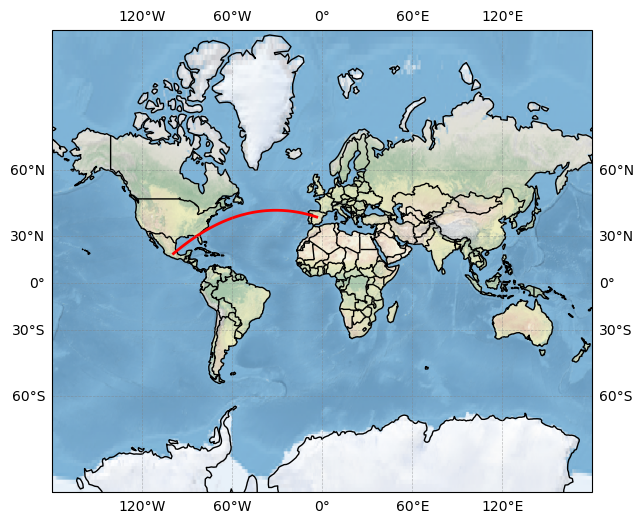

In [54]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
# Crear una instancia de la proyección de Mercator
projection = ccrs.Mercator()

# Crear la figura y los ejes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Dibujar el mapa de fondo
ax.coastlines()
ax.stock_img()
ax.add_feature(cf.BORDERS)
# Dibujar meridianos y paralelos
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Dibujar geodésicas
plt.plot(lon,lat, marker=None, linewidth=2, color='red', transform=ccrs.PlateCarree())


# Mostrar el mapa
plt.show()

# Calcula y grafica la geodesica entre dos ciudades del mundo.

In [55]:
import plotly.graph_objects as go
from geographiclib.geodesic import Geodesic
from geopy.geocoders import Nominatim

# Crear un objeto geolocalizador
geolocator = Nominatim(user_agent="geodesic_app")

# Obtener las coordenadas geográficas de dos ciudades ingresadas por el usuario
ciudad1 = input("Ingrese el nombre de la primera ciudad: ")
ciudad2 = input("Ingrese el nombre de la segunda ciudad: ")

location1 = geolocator.geocode(ciudad1)
location2 = geolocator.geocode(ciudad2)

if location1 is None or location2 is None:
    print("No se pudo encontrar una o ambas ciudades. Verifique los nombres ingresados.")
else:
    # Coordenadas geográficas de las ciudades
    coordenadas_ciudad1 = (location1.latitude, location1.longitude)
    coordenadas_ciudad2 = (location2.latitude, location2.longitude)

    # Calcular la geodésica entre las coordenadas
    geod = Geodesic.WGS84.InverseLine(coordenadas_ciudad1[0], coordenadas_ciudad1[1], coordenadas_ciudad2[0], coordenadas_ciudad2[1])

    # Calcular los puntos a lo largo de la geodésica
    n_points = 1000  # Número de puntos a calcular
    distances = np.linspace(0, geod.s13, n_points)
    lon = np.zeros(n_points)
    lat = np.zeros(n_points)
    for i, distance in enumerate(distances):
        g = geod.Position(distance)
        lon[i] = g['lon2']
        lat[i] = g['lat2']

    # Crear el gráfico de la Tierra
    fig = go.Figure(go.Scattergeo())  # Crea un gráfico vacío con coordenadas geográficas
    fig.update_geos(projection_type="orthographic")  # Nos muestra el globo terráqueo.
    fig.update_layout(height=600, margin={"r": 0, "t": 0, "l": 0, "b": 0})  # Actualiza el diseño del gráfico
    fig.update_geos(
        landcolor="green",  # Color de los países en verde.
        showocean=True,  # Se muestran los océanos.
        oceancolor="lightblue",  # El color de los océanos.
        showlakes=True,  # Se muestran los lagos.
        lakecolor="lightblue",  # El color de los lagos.
        showcountries=True, countrycolor="RebeccaPurple",
    )

    # Agregar los puntos y la línea que representa la geodésica
    fig.add_trace(go.Scattergeo(
        lon=lon,
        lat=lat,
        mode='lines',
        line=dict(width=2, color='red'),
    ))

    fig.add_trace(go.Scattergeo(
        lon=[coordenadas_ciudad1[1], coordenadas_ciudad2[1]],
        lat=[coordenadas_ciudad1[0], coordenadas_ciudad2[0]],
        mode='markers',
        marker=dict(size=5, color='blue'),
        text=[ciudad1, ciudad2],
    ))

    # Configuración adicional del diseño del gráfico
    fig.update_layout(
        title=f'Geodesica entre {ciudad1} y {ciudad2}',
        showlegend=False,
    )

    # Mostrar el gráfico
    fig.show()


Ingrese el nombre de la primera ciudad: Tunja
Ingrese el nombre de la segunda ciudad: Paris


In [56]:
Grados = [math.radians(grado) for grado in lat]
import numpy as np

latitud = []

def proyec(Φ):
    return np.log((np.sin(Φ/2 + np.pi/4)) / (np.cos(Φ/2 + np.pi/4)))

for i in Grados:
    latitud.append(proyec(i))
Grados1 = [math.degrees(radian) for radian in latitud]

# Proyección de la Geodesica.

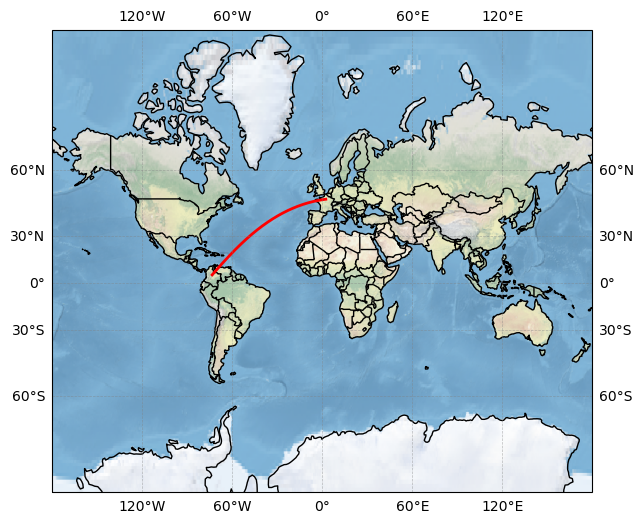

In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
# Crear una instancia de la proyección de Mercator
projection = ccrs.Mercator()

# Crear la figura y los ejes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Dibujar el mapa de fondo
ax.coastlines()
ax.stock_img()
ax.add_feature(cf.BORDERS)
# Dibujar meridianos y paralelos
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Dibujar geodésicas
plt.plot(lon,lat, marker=None, linewidth=2, color='red', transform=ccrs.PlateCarree())


# Mostrar el mapa
plt.show()

# Proyección con PlateCarre.

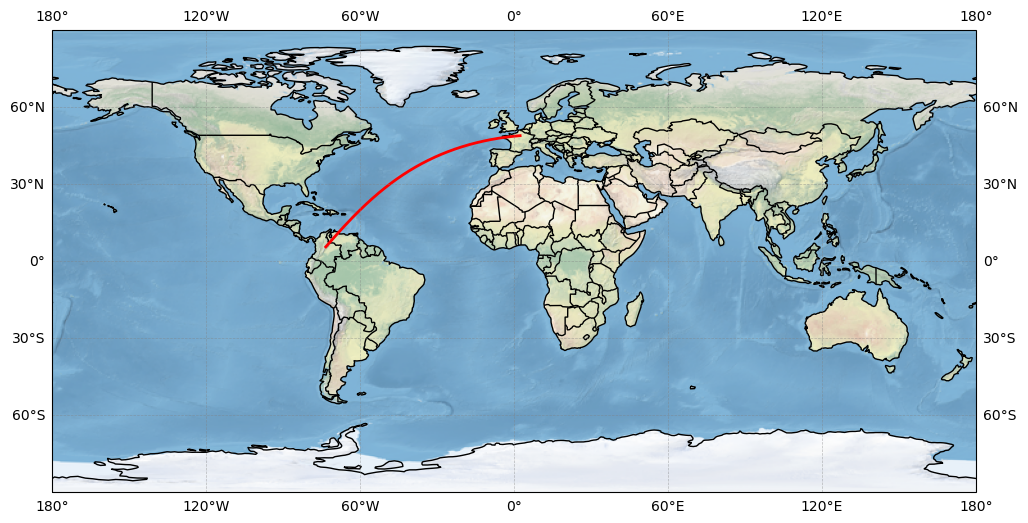

In [58]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
# Crear una instancia de la proyección de Mercator
projection = ccrs.PlateCarree()

# Crear la figura y los ejes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Dibujar el mapa de fondo
ax.coastlines()
ax.stock_img()
ax.add_feature(cf.BORDERS)
# Dibujar meridianos y paralelos
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Dibujar geodésicas
plt.plot(lon,lat, marker=None, linewidth=2, color='red', transform=ccrs.PlateCarree())


# Mostrar el mapa
plt.show()